# Experiment 4: Numpy Arrays as data structure for Graphs

[//]: # (------------------------------------------    DO NOT MODIFY THIS    ------------------------------------------)
<style type="text/css">
.tg  {border-collapse:collapse;
      border-spacing:0;
     }
.tg td{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg th{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       font-weight:normal;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg .tg-fymr{border-color:inherit;
             font-weight:bold;
             text-align:left;
             vertical-align:top
            }
.tg .tg-0pky{border-color:inherit;
             text-align:left;
             vertical-align:top
            }
[//]: # (--------------------------------------------------------------------------------------------------------------)

[//]: # (-------------------------------------    FILL THIS OUT WITH YOUR DATA    -------------------------------------)
</style>
<table class="tg">
    <tbody>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Title:</td>
        <td class="tg-0pky">Experiment 5: Numpy Arrays as data structure for Graphs</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Authors:</td>
        <td class="tg-0pky">
            <a href="https://github.com/ecarrenolozano" target="_blank" rel="noopener noreferrer">Edwin Carreño</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Affiliations:</td>
        <td class="tg-0pky">
            <a href="https://www.ssc.uni-heidelberg.de/en" target="_blank" rel="noopener noreferrer">Scientific Software Center</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Date Created:</td>
        <td class="tg-0pky">30.10.2024</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Description:</td>
        <td class="tg-0pky">Creation of a graph using numpy arrays and data from CSV files. Conversion to NetworkX is tested too.</td>
      </tr>
    </tbody>
</table>

[//]: # (--------------------------------------------------------------------------------------------------------------)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>  
</table>

## Overview

In this notebook we are going to:

1. Import CSV (comma-separated values) data from nodes and edges.
2. Describe the data from CSVs.
3. Create a data pipeline that:
   - load csv data.
   - transform the format of tuples that represents edges (from 5 to 3 elements).
   - transform the format of tuples that represents nodes (from 3 to 2 elements).
   - create Numpy Arrays (data structures) of tuples containing the information of edges and nodes.
4. Create a NetworkX graph from Numpy arrays that contain information about edges.

## Setup (if required)

**Note:** The following function checks if a library of interest is installed. Depending on the parameter `install`, you can install it automatically.

In [1]:
import subprocess
from importlib.metadata import version
from importlib.util import find_spec

def check_package_install(package, install=False):
    if find_spec(package) is None:
        print(package,"is NOT installed in Python environment")
        if install:
            try:
                subprocess.check_call(["python", "-m", "pip", "install", package])
            except subprocess.CalledProcessError as e:
                print(f"\tError occurred: {e}")
                print(f"\tCheck the name of your package!")
            print(package, "has been installed with version: ", version(package))
    else:
        print(package,"is installed with version: ", version(package))

### NetworkX installation

In [2]:
check_package_install("networkx", install=False)

networkx is installed with version:  3.4.2


### Numpy installation

In [3]:
check_package_install("numpy", install=False)

numpy is installed with version:  2.0.1


## Importing Libraries

In [20]:
"""
Recommendations:
    - Respect the order of the imports, they are indicated by the numbers 1, 2, 3.
    - One import per line is recommended, with this we can track easily any modified line when we use git.
    - Absolute imports are recommended (see 3. Local application/library specific imports below), they improve readability and give better error messages.
    - You should put a blank line between each group of imports.
"""

# future-imports (for instance: from __future__ import barry_as_FLUFL)
# from __future__ import barry_as_FLUFL  

# 1. Standard library imports
import ast
import csv
import os
from itertools import islice

# 2. Related third party imports
import networkx as nx
import numpy as np
from IPython.display import Image 

# 3. Local application/library specific imports
# import <mypackage>.<MyClass>         # this is an example
# from <mypackage> import <MyClass>    # this is another example 

## Helper Functions

In [5]:
def load_csv_generator(file_path, header=True):
    with open(file_path, "r") as file:
        reader = csv.reader(file)
        if header:
            next(reader)
        for row in reader:
            yield tuple(row)

def create_arrays():
    nodes_ds = load_csv_generator(file_path_nodes, header=True)
    nodes_ds = create_numpy_array(nodes_ds)

    edges_ds = load_csv_generator(file_path_edges, header=True)
    edges_ds = create_numpy_array(edges_ds)

    return nodes_ds, edges_ds

def create_numpy_array(iterable):
    return np.fromiter(iterable, dtype=object)

def to_networkx_nodes_format(nodes_iterable, mapping_properties=True):
    for (node_id, node_label, properties) in nodes_iterable:
        # Original format
        #  (node id, node label, properties)

        # Desired format
        #  (node id, properties as dict)

        properties = ast.literal_eval(properties)

        if mapping_properties:
            properties["node_label"] = node_label

        yield(
            node_id,
            properties
        )

def to_networkx_edges_format(edges_iterable, mapping_properties=True):
    for (edge_id, source_id, target_id, edge_label, properties) in edges_iterable:
        # Original format
        #  (edge id, source (edge id), target (edge id), label, properties)

        # Desired format
        #  (source (edge id), target (edge id), properties as dict)

        properties = ast.literal_eval(properties)

        if mapping_properties:
            properties["edge_id"] = edge_id
            properties["edge_label"] = edge_label

        yield (
            source_id,
            target_id,
            properties,
        )

def networkx_graph_from_nparrays(nodes_nparray, edges_nparray, graph_type=nx.DiGraph()):
    # Build an empty graph
    networkx_graph = graph_type

    # Populate the graph with edges containing properties
    networkx_graph.add_edges_from(edges_nparray)

    # Populate the graph with nodes containing properties
    networkx_graph.add_nodes_from(nodes_nparray)

    return networkx_graph

## Introduction

A graph is collection of nodes and edges that expresses the relationship between nodes. A minimal node contain their `node label`. Similarly, a minimal edge contain the `source id`, `target id` and `label`.

The data for nodes and edges can be stored in form of tuples. Figure 1 shows the graph that can be constructed with the information from the dataset `dataset_dummy2_edges.csv` and `dataset_dummy2_nodes.csv` 

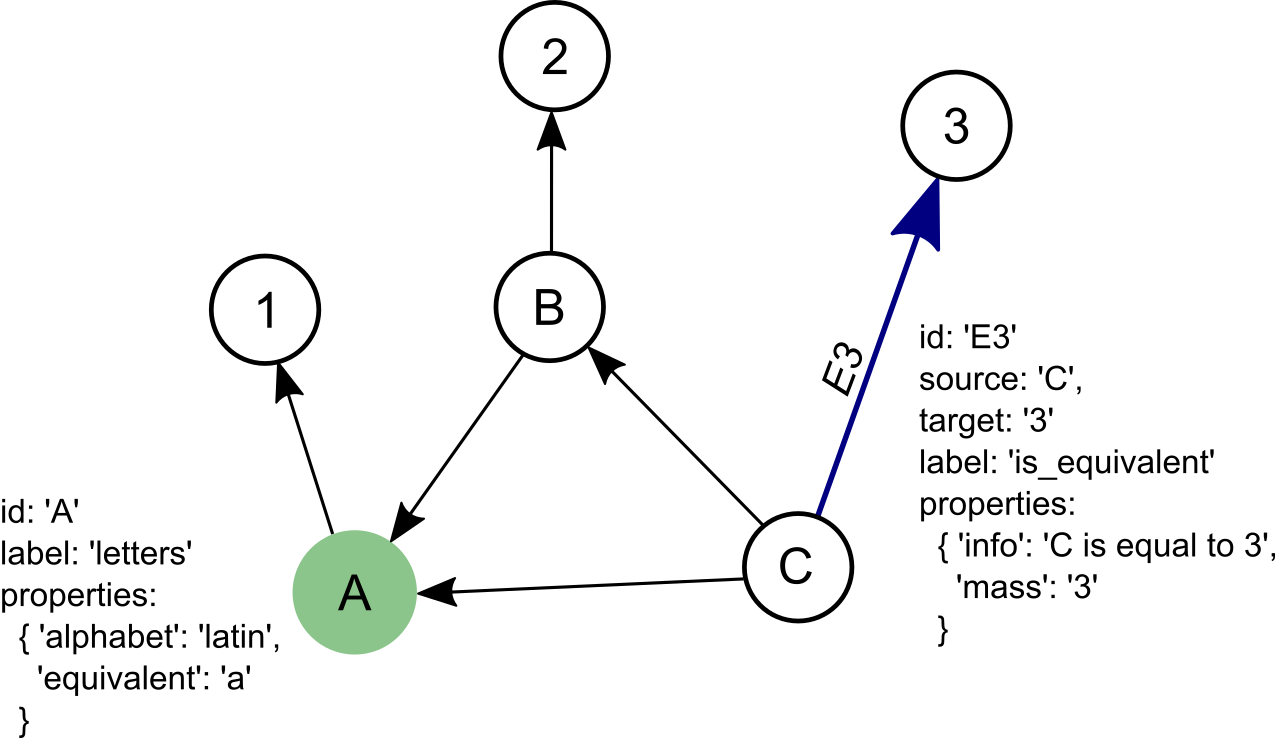

In [25]:
Image(filename="./images/graph_dataset_dummy2.png", width=600, height=600) 

In this notebook we are going to work with a little bit complex graphs (more nodes, and more edges). Additionally, each node and edge contain properties that are from our interest to keep in order to use for subsequent frameworks, i.e. machine learning and optimization frameworks.

## Section 1: Load the CSV data that contains nodes and edges

For this exercise, each graph is represented by two CSV files. One containing information about the **nodes** and the other about the **edges**. To indicate that both files correspond to the same graph, their names include the same number of nodes. For example:

- `dataset_30_nodes_proteins.csv`: contains 30 rows (nodes).
- `dataset_30_edges_interactions.csv`: contains 47 rows (edges).

We reference each CSV file or dataset as follows:

In [6]:
filename_nodes = "dataset_dummy2_nodes.csv"
filename_edges = "dataset_dummy2_edges.csv"

#filename_nodes = "dataset_30_nodes_proteins.csv"
#filename_edges = "dataset_30_edges_interactions.csv"

# FILE_PATH_DATASETS = "../../../DATASETS"
FILE_PATH_DATASETS = "../data_examples"

### 1.1: Load Nodes

The CSV file for nodes contains three columns:
- `UniProt ID`
- `label`
- `properties`

We are going to load the information of nodes as a **list of tuples**. Each tuple represents a node with the structure:
- `(id, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is a string containing a dictionary of properties.

In [7]:
file_path_nodes = os.path.join(FILE_PATH_DATASETS, filename_nodes)

list_nodes_example = list(islice(load_csv_generator(file_path_nodes, header=True), 3))

In [8]:
print("The list of NODES contains: {} nodes".format(len(list_nodes_example)))
print("Examples:")
for node in list_nodes_example:
    print("{}".format(node))

The list of NODES contains: 3 nodes
Examples:
('A', 'letters', "{'alphabet': 'latin', 'equivalent':'a'}")
('B', 'letters', "{'alphabet': 'latin', 'equivalent':'b'}")
('C', 'letters', "{'alphabet': 'latin', 'equivalent':'c'}")


### 1.2: Load Edges

The CSV file for edges contains five columns:
- `Relationship ID`
- `Source ID`
- `Target ID`
- `label`
- `properties`

We are going to load the information of edges as a list of tuples. Each tuple represents a node with thethe structure:
- `(id, source, target, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is string containing a dictionary of properties.

In [9]:
file_path_edges = os.path.join(FILE_PATH_DATASETS, filename_edges)

list_edges_example = list(islice(load_csv_generator(file_path_edges, header=True), 3))

In [10]:
print("The list of EDGES contains: {} edges".format(len(list_edges_example)))
print("Examples:")
for edge in list_edges_example:
    print("{}".format(edge))

The list of EDGES contains: 3 edges
Examples:
('E1', 'A', '1', 'is_equivalent', "{'info': 'A is equal to 1', 'mass=': 1}")
('E2', 'B', '2', 'is_equivalent', "{'info': 'B is equal to 2', 'mass=': 2}")
('E3', 'C', '3', 'is_equivalent', "{'info': 'C is equal to 3', 'mass=': 3}")


## Section 2: Create Data Pipeline

- **input:** CSV data of edges
- **output:** Numpy arrays containing information of nodes and edges

The pipeline consist of one stages:

| Stage | Function                      | Description |
|-------|-------------------------------| ----------- |
| 1     | `create_arrays()`      | create  Numpy arrays for nodes and edges      |
|       | `load_csv_generator()` | read the csv and load nodes data as generator |
|       | `load_csv_generator()` | read the csv and load edges data as generator |

### 2.1 Create Numpy Array (data structure)

In [11]:
nodes_nparray, edges_nparray = create_arrays()

In [12]:
print("Dimension array: {}".format(nodes_nparray.shape))
print(f"Type: {type(nodes_nparray)}")

nodes_examples = nodes_nparray[0:5]

print("Example: \n\t")
for node in nodes_examples:
    print(node)

Dimension array: (6,)
Type: <class 'numpy.ndarray'>
Example: 
	
('A', 'letters', "{'alphabet': 'latin', 'equivalent':'a'}")
('B', 'letters', "{'alphabet': 'latin', 'equivalent':'b'}")
('C', 'letters', "{'alphabet': 'latin', 'equivalent':'c'}")
('1', 'numbers', "{'mathset':'integer', 'name':'one'}")
('2', 'numbers', "{'mathset':'integer', 'name':'two'}")


In [13]:
print("Dimension array: {}".format(edges_nparray.shape))
print(f"Type: {type(edges_nparray)}")

edges_examples = edges_nparray[0:5]

print("Example: \n\t")
for edge in edges_examples:
    print(edge)

Dimension array: (6,)
Type: <class 'numpy.ndarray'>
Example: 
	
('E1', 'A', '1', 'is_equivalent', "{'info': 'A is equal to 1', 'mass=': 1}")
('E2', 'B', '2', 'is_equivalent', "{'info': 'B is equal to 2', 'mass=': 2}")
('E3', 'C', '3', 'is_equivalent', "{'info': 'C is equal to 3', 'mass=': 3}")
('R1', 'B', 'A', 'follows', "{'info': 'B follows A', 'mass=': 1.0}")
('R2', 'C', 'B', 'follows', "{'info': 'C follows B', 'mass=': 2.0}")


## Section 3: Converting to Networkx graph
### Create Data Pipeline
- **input:** Numpy arrays of nodes and edges
- **output:** A NetworkX graph

The pipeline consist of two consecutive stages:

| Stage | Function                 | Description |
|-------|--------------------------|--------------------------------------------------------------|
| 1     | `to_networkx_nodes_format()` | generator that converts nodes to networkx format (node, properties) |
|       | `to_networkx_edges_format()` | generator that converts edges to networkx format (source, target, properties) |
| 2     | `networkx_graph_from_arrays()`| convert lists (nodes and edges) into a NetworkX graph. |
|       | `nx.Graph()`                 | create an empty NetworkX graph 
|       | `graph.add_edges_from()`     | populate an empty graph with edges including properties |
|       | `graph.add_nodes_from()`     | populate a graph with nodes including properties |

In [14]:
try:
    G.clear()
    print("Graph has been cleared!")
except:
    print("Graph G doesn't exist")

Graph G doesn't exist


### 3.1 Create a Directed Graph

In [15]:
G = networkx_graph_from_nparrays(nodes_nparray=to_networkx_nodes_format(nodes_nparray),
                                 edges_nparray=to_networkx_edges_format(edges_nparray),
                                 graph_type=nx.DiGraph()
                                )

### 3.3 Draw Graph

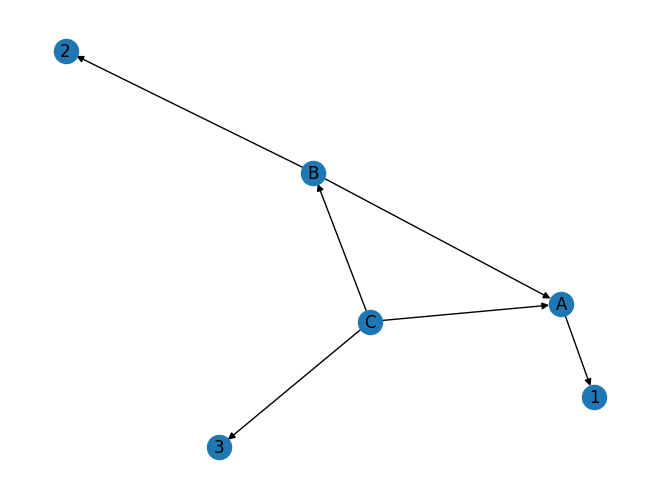

In [16]:
nx.draw(G, with_labels=True)

### 3.4 Some statistics

In [17]:
print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 6
Number of edges: 6


In [18]:
limit = 5
for index, edge in enumerate(G.edges(data=True)):
    if index >=5:
        break
    print(edge)

('A', '1', {'info': 'A is equal to 1', 'mass=': 1, 'edge_id': 'E1', 'edge_label': 'is_equivalent'})
('B', '2', {'info': 'B is equal to 2', 'mass=': 2, 'edge_id': 'E2', 'edge_label': 'is_equivalent'})
('B', 'A', {'info': 'B follows A', 'mass=': 1.0, 'edge_id': 'R1', 'edge_label': 'follows'})
('C', '3', {'info': 'C is equal to 3', 'mass=': 3, 'edge_id': 'E3', 'edge_label': 'is_equivalent'})
('C', 'B', {'info': 'C follows B', 'mass=': 2.0, 'edge_id': 'R2', 'edge_label': 'follows'})


In [19]:
limit = 5
for index, node in enumerate(G.nodes(data=True)):
    if index >=5:
        break
    print(node)

('A', {'alphabet': 'latin', 'equivalent': 'a', 'node_label': 'letters'})
('1', {'mathset': 'integer', 'name': 'one', 'node_label': 'numbers'})
('B', {'alphabet': 'latin', 'equivalent': 'b', 'node_label': 'letters'})
('2', {'mathset': 'integer', 'name': 'two', 'node_label': 'numbers'})
('C', {'alphabet': 'latin', 'equivalent': 'c', 'node_label': 'letters'})
